<a href="https://colab.research.google.com/github/wdon021/From_Colab/blob/master/Assignment3_Extend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
# import scipy.misc as smp
from PIL import Image as im
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, display
import pandas as pd
from scipy.ndimage.interpolation import rotate
from PIL import ImageDraw

Circle (randomly)
- default
- rotated blur circle
- different size

In [2]:
def create_circle_random(size = 28, radius = 5, color = 255):
  k = np.random.random_sample(size=2)
  col_random = np.int(16*k[0])+6
  row_random = np.int(16*k[1])+6
  data = np.zeros((size, size), dtype = np.uint8)
  ci,cj = row_random, col_random
  cr = radius
  # cr = round(np.round(radius+np.random.random()))
  # if(np.random.random()>0.5):
  #   cr = np.round(radius-np.random.random()*2)
  if(((col_random+cr)>=28) | ((col_random-cr)<1)):
    print("col_random is out of bound")
  if(((row_random+cr)>=28) | ((row_random-cr)<1)):
    print("row_random is out of bound")
  I,J = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))
  # basic formula for a circle (x - a)**2 + (y - b)**2 = r**2
  # calculate the radius
  dist = np.sqrt((I-ci)**2 +(J-cj)**2)
  # Assign value of any for those points within radius
  data[np.where(dist<cr)] = color
  if(np.random.random()>0.5):
    data = rotate(data, angle = np.random.random()*365, reshape=False)
  # img = im.fromarray(data)
  return data.flatten()

Rectangle
- default
- numpy.rotate

In [3]:
def rect_x_y(height, width):
  k = np.random.random_sample(size=2)
  start_x = np.int(20*k[0])
  start_y = np.int(20*k[1])
  rows = start_x + height 
  cols = start_y + width
  return start_x, start_y, rows, cols

In [4]:
def get_rect(x, y, width, height, angle):
  rect = np.array([(0, 0), (width, 0), (width, height), (0, height), (0, 0)])
  theta = (np.pi / 180.0) * angle
  R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  offset = np.array([x, y])
  transformed_rect = np.dot(rect, R) + offset
  return transformed_rect

In [5]:
def rec_angle(size, x, y, width, height):
  angles = np.round(np.random.random()*365)
  data = np.zeros((size, size), dtype = np.uint8)
  img = im.fromarray(data)
  draw = ImageDraw.Draw(img)
  rect = get_rect(x = x, y = y, width = width, height = height, angle = angles)
  # rect1 = rect[0:4]
  draw.polygon([tuple(p) for p in rect], fill= 255)
  new_data = np.asarray(img)
  return new_data

In [6]:
def rect_random(size, color):
  data = np.zeros((size, size), dtype = np.uint8)
  # x1, y1, x2, y2 = 0, 0, 0, 0
  x1, y1, x2, y2 = rect_x_y(4, 8)
  # print([x1, y1, x2, y2 ])
  while((x2 >=28)|(y2 >=28)):
    x1, y1, x2, y2 = rect_x_y(4, 8)
  # print([x1, y1, x2, y2 ])
  data[x1:x2, y1:y2] = color
  data = np.rot90(data, k=np.round(np.random.random()*3))
  if(np.random.random()>0.5):
    data = rotate(data, angle = np.round(np.random.random()*365), reshape=False)
  # img = im.fromarray(data)
  # return data.flatten()
  return data

In [7]:
def combine_rect(sizes):
  data = np.zeros((sizes, sizes), dtype = np.uint8)
  if(np.random.random()<= 0.33333333333333333):
    data = rec_angle(size = sizes, x = 14+np.round(np.random.uniform(-1,1)*3), y =14+np.round(np.random.uniform(-1,1)*3),  width = 4, height = 8)
  else:
    data = rect_random(sizes, 255)
  # img = im.fromarray(data)
  return data.flatten()

Triangle
- default
- np.rotate
- interploration.rotate
- draw.polygon

In [8]:
def triang_ang(sizes, x, y):
  data = np.zeros((sizes, sizes), dtype = np.uint8)
  img = im.fromarray(data)
  draw = ImageDraw.Draw(img)
  rect = get_rect(x = x, y = y, width = 8, height = 8, angle = round(np.random.random()*365))
  tri = rect[0:3]
  draw.polygon([tuple(p) for p in tri], fill= 255)
  new_data = np.asarray(img)
  return new_data

In [9]:
def triang_ran(size, color, diagonals = -1):
  data = np.zeros((size, size), dtype = np.uint8)
  # define a rectangle
  start_x, start_y, rows, cols = rect_x_y(8, 8)
  # print([start_x, start_y, rows, cols])
  while((rows >=28)|(cols >=28)):
    start_x, start_y, rows, cols = rect_x_y(8, 8)
  # print([start_x, start_y, rows, cols])
  data[start_x:rows, start_y:cols] = color
  # return lower triangle of rectangle
  if(np.random.random()>=0.5):
    data[start_x:rows, start_y:cols] = np.tril(data[start_x:rows, start_y:cols], diagonals)
  else:
    data[start_x:rows, start_y:cols] = np.triu(data[start_x:rows, start_y:cols], diagonals)
  data = np.rot90(data, k=np.floor(np.random.uniform(0,4)))
  if(np.random.random()<0.5):
    data = rotate(data, angle = np.round(np.random.random()*365), reshape=False)
  # img = im.fromarray(data)
  return data
  # return data.flatten()

In [10]:
def combine_trian(sizes):
  data = np.zeros((sizes, sizes), dtype = np.uint8)
  if(np.random.random()<= 0.33333333333333333):
    data = triang_ang(sizes =sizes, x = 14+np.round(np.random.uniform(-1,1)*3), y =14+np.round(np.random.uniform(-1,1)*3))
  else:
    data = triang_ran(sizes, 255)
  # img = im.fromarray(data)
  return data.flatten()

In [14]:
def random_shape():
  data = np.array([])
  name = ""
  prob = np.random.random_sample()
  # print(prob)
  if(prob<= 0.33333333333333333):
    data = create_circle_random(size = 28,radius= (5+np.round(np.random.uniform(-1,1))))
    name = "C"
  elif((prob> 0.33333333333333333) & (prob<= 0.66666666666666666)):
    data = combine_rect(sizes = 28)
    name = "R"
  else:
    data = combine_trian(sizes = 28)
    name = 'T'
  return data, name


In [15]:
def random_generate(size):
  shape_vect = []
  shape_name = []
  for i in range(size):
    s_vect, s_name = random_shape()
    shape_vect.append(s_vect)
    shape_name.append(s_name)
  num_2d_shape = np.array(shape_vect).reshape(-1, 784)
  return num_2d_shape, shape_name

##### Visulization of Extended

col_random is out of bound


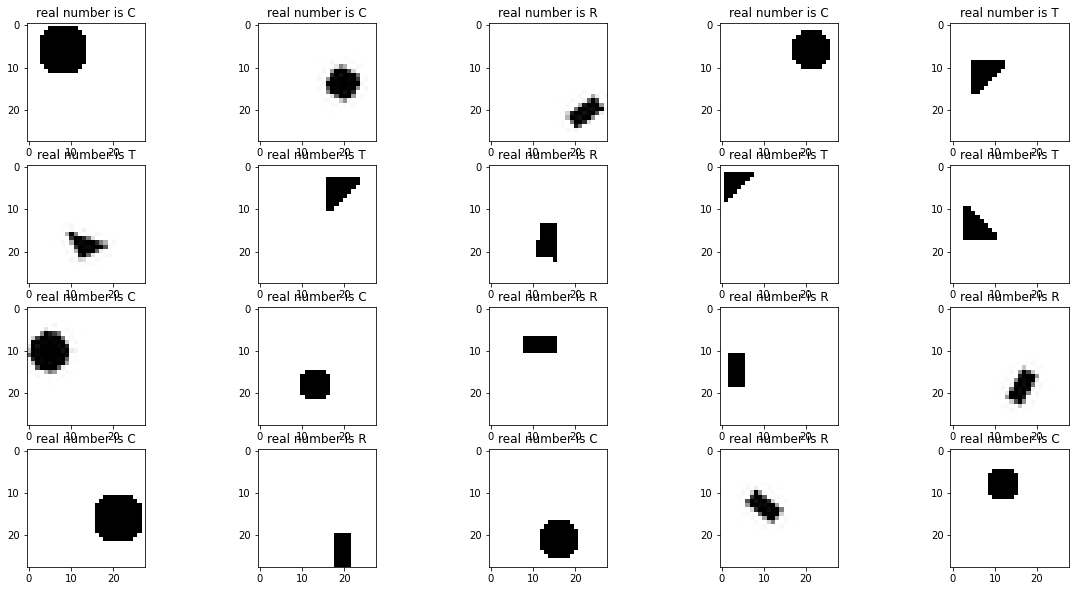

In [27]:
train_shape, train_name =  random_generate(size = 20)
train_shape__ = train_shape.reshape(train_shape.shape[0], 28, 28)
fig, axis = plt.subplots(4, 5, figsize = (20, 10))
for i, ax in enumerate(axis.flat):
  ax.imshow(train_shape__[i], cmap = 'binary')
  # digit = y_train[i].argmax()
  ax.set(title = f"real number is {train_name[i]}")

Idea behind Extend
- Blur image, different size, different orientation and distortion.
  - some looks like hand drawing or mouse drag drawing on the computer.
- We don't want model to trained on just few "identities" or features of objects.
- CNN has to trains the convolution kernels "intelligently".
- We want model to recognise and understand the "concept" of the triangle, rectangle and circle.
- We want CNN to recognize the distorted object as human eye can recognize them.
